## Assignment 4

This assignment is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [16]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print(default_of_credit_card_clients.metadata) 
  
# variable information 
print(default_of_credit_card_clients.variables) 

{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [46]:
#required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [32]:
#loading the data

dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", header=1)

##These lines were breaking everything for me
#dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls")
#dataset.columns = dataset.iloc[0] 

dataset.drop(columns=['ID'], inplace=True)

In the following, you can take a look into the dataset.

In [33]:
dataset.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [34]:
dataset.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

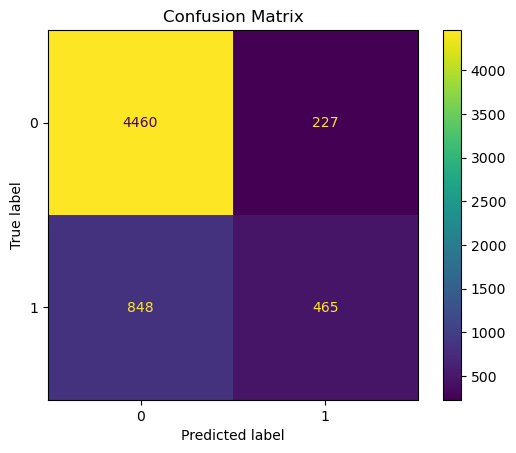

0.8208333333333333


In [47]:
# YOUR CODE HERE
#data
X = dataset.drop(columns=['default payment next month'])
y = dataset['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#decision tree + fit
tree_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

#confusion matrix - needs actual and predicted y values
confusion = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=confusion)
matrix.plot()
plt.title("Confusion Matrix")
plt.show()

print(accuracy_score(y_test, y_pred))

In [ ]:
This confusion matrix for the Decision Tree classifier shows that there is a relatively high accuracy score. Based on the test data and the predicted values
there are 4460 True Positive values, 227 False Negative values, 848 False Positive values, and 465 True Negative values. Given 
values an accuracy score of around 0.821 can be drawn (~82%).

#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

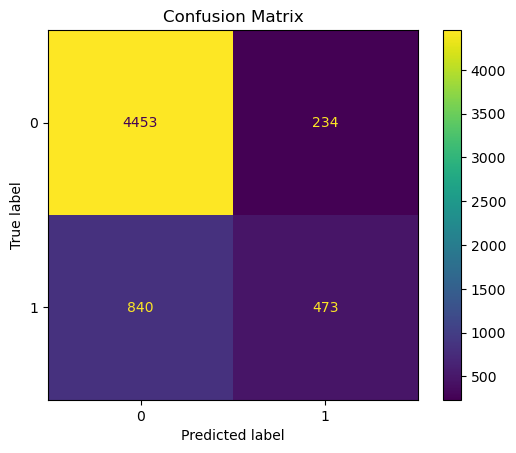

0.821


In [48]:
# YOUR CODE HERE

param_distributions = {
    'max_depth': list(range(1, 5)),  # Max depth of the tree
    'min_samples_split': list(range(2, 11)),  # Minimum samples required to split an internal node
    'min_samples_leaf': list(range(1, 11)),  # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

random_tree = RandomizedSearchCV(estimator=tree_clf, param_distributions=param_distributions)

#fit to RandomizedSearchCV
random_tree.fit(X_train, y_train)

#best model
best_model = random_tree.best_estimator_
y_pred_rscv = best_model.predict(X_test)

#confusion matrix - needs actual and predicted y values
confusion2 = confusion_matrix(y_test, y_pred_rscv)
matrix2 = ConfusionMatrixDisplay(confusion_matrix=confusion2)
matrix2.plot()
plt.title("Confusion Matrix")
plt.show()

print(accuracy_score(y_test, y_pred_rscv))

In [ ]:
This confusion matrix for the Decision Tree classifier using randomized search cv shows that there is also a relatively high 
accuracy score. Based on the test data and the predicted values there are 4453 True Positive values, 234 False Negative values, 
808 False Positive values, and 473 True Negative values. Given values an accuracy score of around 0.821 can be drawn (~82%). 
Compared to just using the regular decision tree with the two hyper-parameters as in question 1, the accuracies are the same/very
close together.

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


In [51]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier

#Random Forest
rnf_clf = RandomForestClassifier()

#AdaBoost Classifier
ada_clf = AdaBoostClassifier()

#Extra Tree Classifier
ext_clf = ExtraTreesClassifier()

#Gradient Boosted Tree Classifier
grd_clf = GradientBoostingClassifier()

for model in (rnf_clf, ada_clf, ext_clf, grd_clf):
    model.fit(X_train, y_train)
    y_pred_models = model.predict(X_test);
    print(model.__class__.__name__, accuracy_score(y_test, y_pred_models));

RandomForestClassifier 0.8155
AdaBoostClassifier 0.8166666666666667
ExtraTreesClassifier 0.8128333333333333
GradientBoostingClassifier 0.8198333333333333


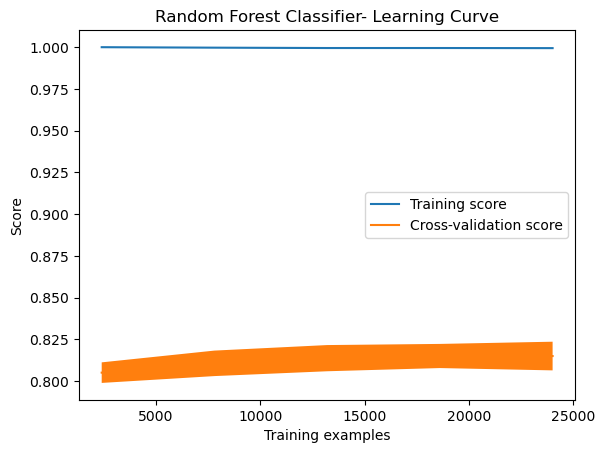

In [57]:
#Plot Learing Curves
from sklearn.model_selection import learning_curve

#Random Forest Classifier
train_sizes, train_scores, test_scores = learning_curve(rnf_clf, X, y, scoring="accuracy")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Random Forest Classifier- Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std)
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

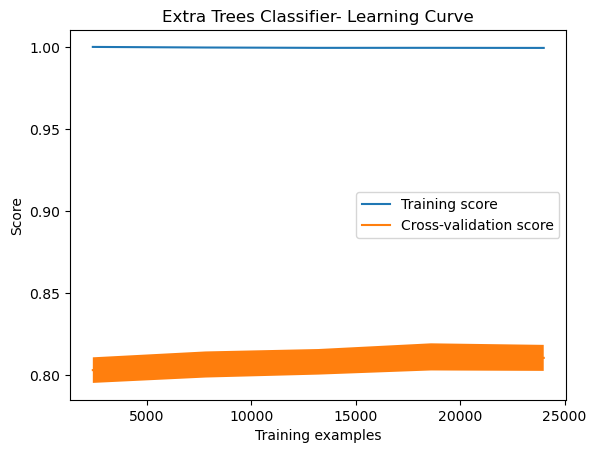

In [56]:
#Extra Trees Classifier
train_sizes, train_scores, test_scores = learning_curve(ext_clf, X, y, scoring="accuracy")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Extra Trees Classifier- Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std)
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

In [59]:
#How does changing hyperparms effect model performance?
After modifying the hyperparameters several times in question 1, it can be seen that, for parameters like max_depth, it impacts
the fitting of the model.Too low of a max_depth value, meant underfitting, while too high meant overfitting, and making the 
model hyper specific.
For all the hyperparameters that could be use for thes modes, it would impact the overall fit.

#Why do you think certain models performed better/worse?
Certain models, like the Gradient Boosting classifier and the AdaBoost Classifier, performed better because it reduces the bias 
that is present in others. Boosting methods are meant to reduce the error of the previous predictors meaning they would perform
better with more iters, meaning more accuracy.

The models like, Random Forest classifier and extra trees classifier performed a bit worse because they are random selections
meant to try to reduce variance, but by definition, randomness does not entail accuracy.

#How does this performance line up with known strengths/weakness of these models?
This performance as seen by the accuracy scores in question 2 lines up with the strengths and weaknesses of each of these models
as the "stronger" models (Gradient Boosing, AdaBoost), have strengths of reducing bias with each child. This could, in turn,
make the model more sensitive.

The performance also lines up with the accuracy scores and the weaknesses of the random models (Random Forest, Extra Trees). 
Randomization reduces bias, however given the simplicity of the node splitting procedure we expect the constant 
factor to be much smaller than in other ensemble based methods with locally optimized thresholds, meaning that accuracy may not
be ob.
